# Filtering and Morphological Operations

In today's world, the camera app on our smartphones is a vital tool that we use to capture our precious moments and share them with the world. Thanks to the advancement of image processing techniques such as filtering and morphological operations, the quality of images captured by smartphone cameras has improved significantly. Filtering and morphological operations are powerful image processing techniques that are commonly used in digital image processing. In this post, we will explore how these techniques are utilized in the camera apps of modern smartphones to enhance image quality, features, and functionality.

### Spatial Filters

Spatial filters are image processing techniques that are used to modify or enhance an image by applying a mathematical function to each pixel or a neighborhood of pixels in an image. These filters are also known as convolution filters, because they perform a convolution operation on an image using a filter kernel. The filter kernel is a small matrix of values that is used to calculate the output value for each pixel in the image. Some common types of spatial filters include low-pass filters, high-pass filters, and median filters. Low-pass filters are used to blur an image, while high-pass filters are used to sharpen an image. Median filters are used to remove noise from an image.

First, let's define some Sobel Operators. For more detail, read about sobel operators from: https://www.tutorialspoint.com/dip/sobel_operator.htm

In [1]:
import numpy as np

# Sobel Operators
# Horizontal Sobel Filter
kernel1 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Vertical Sobel Filter
kernel2 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

# Left Diagonal Filter
kernel3 = np.array([[1, -1, -1],
                    [-1, 1, -1],
                    [-1, -1, 1]])

# Right Diagonal Filter
kernel4 = np.array([[-1, -1, 1],
                    [-1, 1, -1],
                    [1, -1, -1]])

# Edge Detection
kernel5 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

# Sharpen
kernel6 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Box Blur
kernel7 = (1 / 9.0) * np.array([[1., 1., 1.],
                                [1., 1., 1.],
                                [1., 1., 1.]])

# Gaussian Blur
kernel8 = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

Kernels, also known as filters or masks, are small matrices of numbers that are used in various image processing techniques. In spatial filtering, kernels are used to convolve with an image, pixel by pixel, to produce a new filtered image. The values in the kernel determine how the filtering operation is performed, and different kernels can be used to achieve different types of image processing tasks, such as edge detection, smoothing, or sharpening. In morphological operations, kernels are used as structuring elements, which are used to probe the input image to manipulate the shape and structure of objects. Kernels can have different sizes and shapes, such as square, rectangular, or circular, and their values can be manually specified or generated automatically based on a certain mathematical formula.

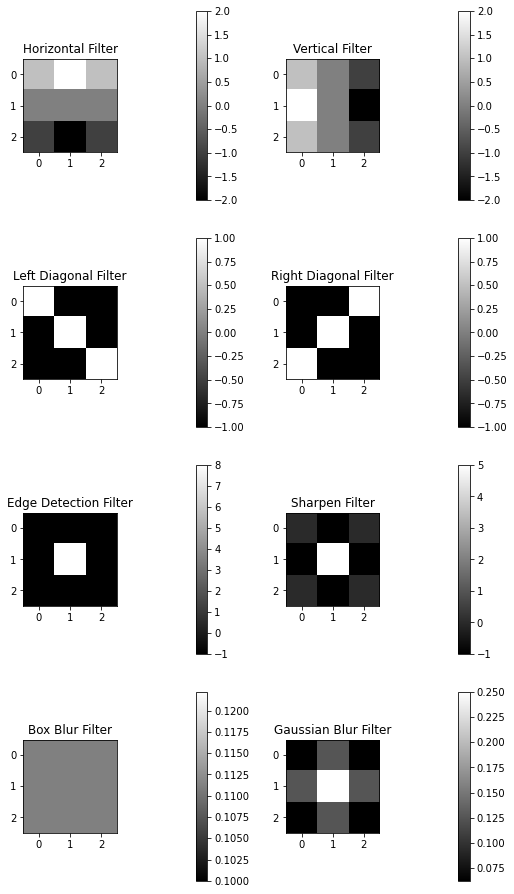

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4,4, gridspec_kw=dict(width_ratios=(8,1,8,1), wspace=1.5), figsize=(8,16))
kern1 = ax[0,0].imshow(kernel1, cmap='gray')
ax[0,0].set_title('Horizontal Filter')
fig.colorbar(kern1, cax=ax[0,1])
kern2 = ax[0,2].imshow(kernel2, cmap='gray')
ax[0,2].set_title('Vertical Filter')
fig.colorbar(kern2, cax=ax[0,3])
kern3 = ax[1,0].imshow(kernel3, cmap='gray')
ax[1,0].set_title('Left Diagonal Filter')
fig.colorbar(kern3, cax=ax[1,1])
kern4 = ax[1,2].imshow(kernel4, cmap='gray')
ax[1,2].set_title('Right Diagonal Filter')
fig.colorbar(kern4, cax=ax[1,3])
kern5 = ax[2,0].imshow(kernel5, cmap='gray')
ax[2,0].set_title('Edge Detection Filter')
fig.colorbar(kern5, cax=ax[2,1])
kern6 = ax[2,2].imshow(kernel6, cmap='gray')
ax[2,2].set_title('Sharpen Filter')
fig.colorbar(kern6, cax=ax[2,3])
kern7 = ax[3,0].imshow(kernel7, cmap='gray')
ax[3,0].set_title('Box Blur Filter')
fig.colorbar(kern7, cax=ax[3,1])
kern8 = ax[3,2].imshow(kernel8, cmap='gray')
ax[3,2].set_title('Gaussian Blur Filter')
fig.colorbar(kern8, cax=ax[3,3]);

Now that we saw all the different kernels, let's see it in action by using it to our sample image. The convolve2d function is used for two-dimensional convolution of an image with a kernel, which is a common operation in digital image processing. This function takes two arguments: the input image and the kernel matrix, and it returns a filtered output image after performing convolution. For more detail about convolve2d, read here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

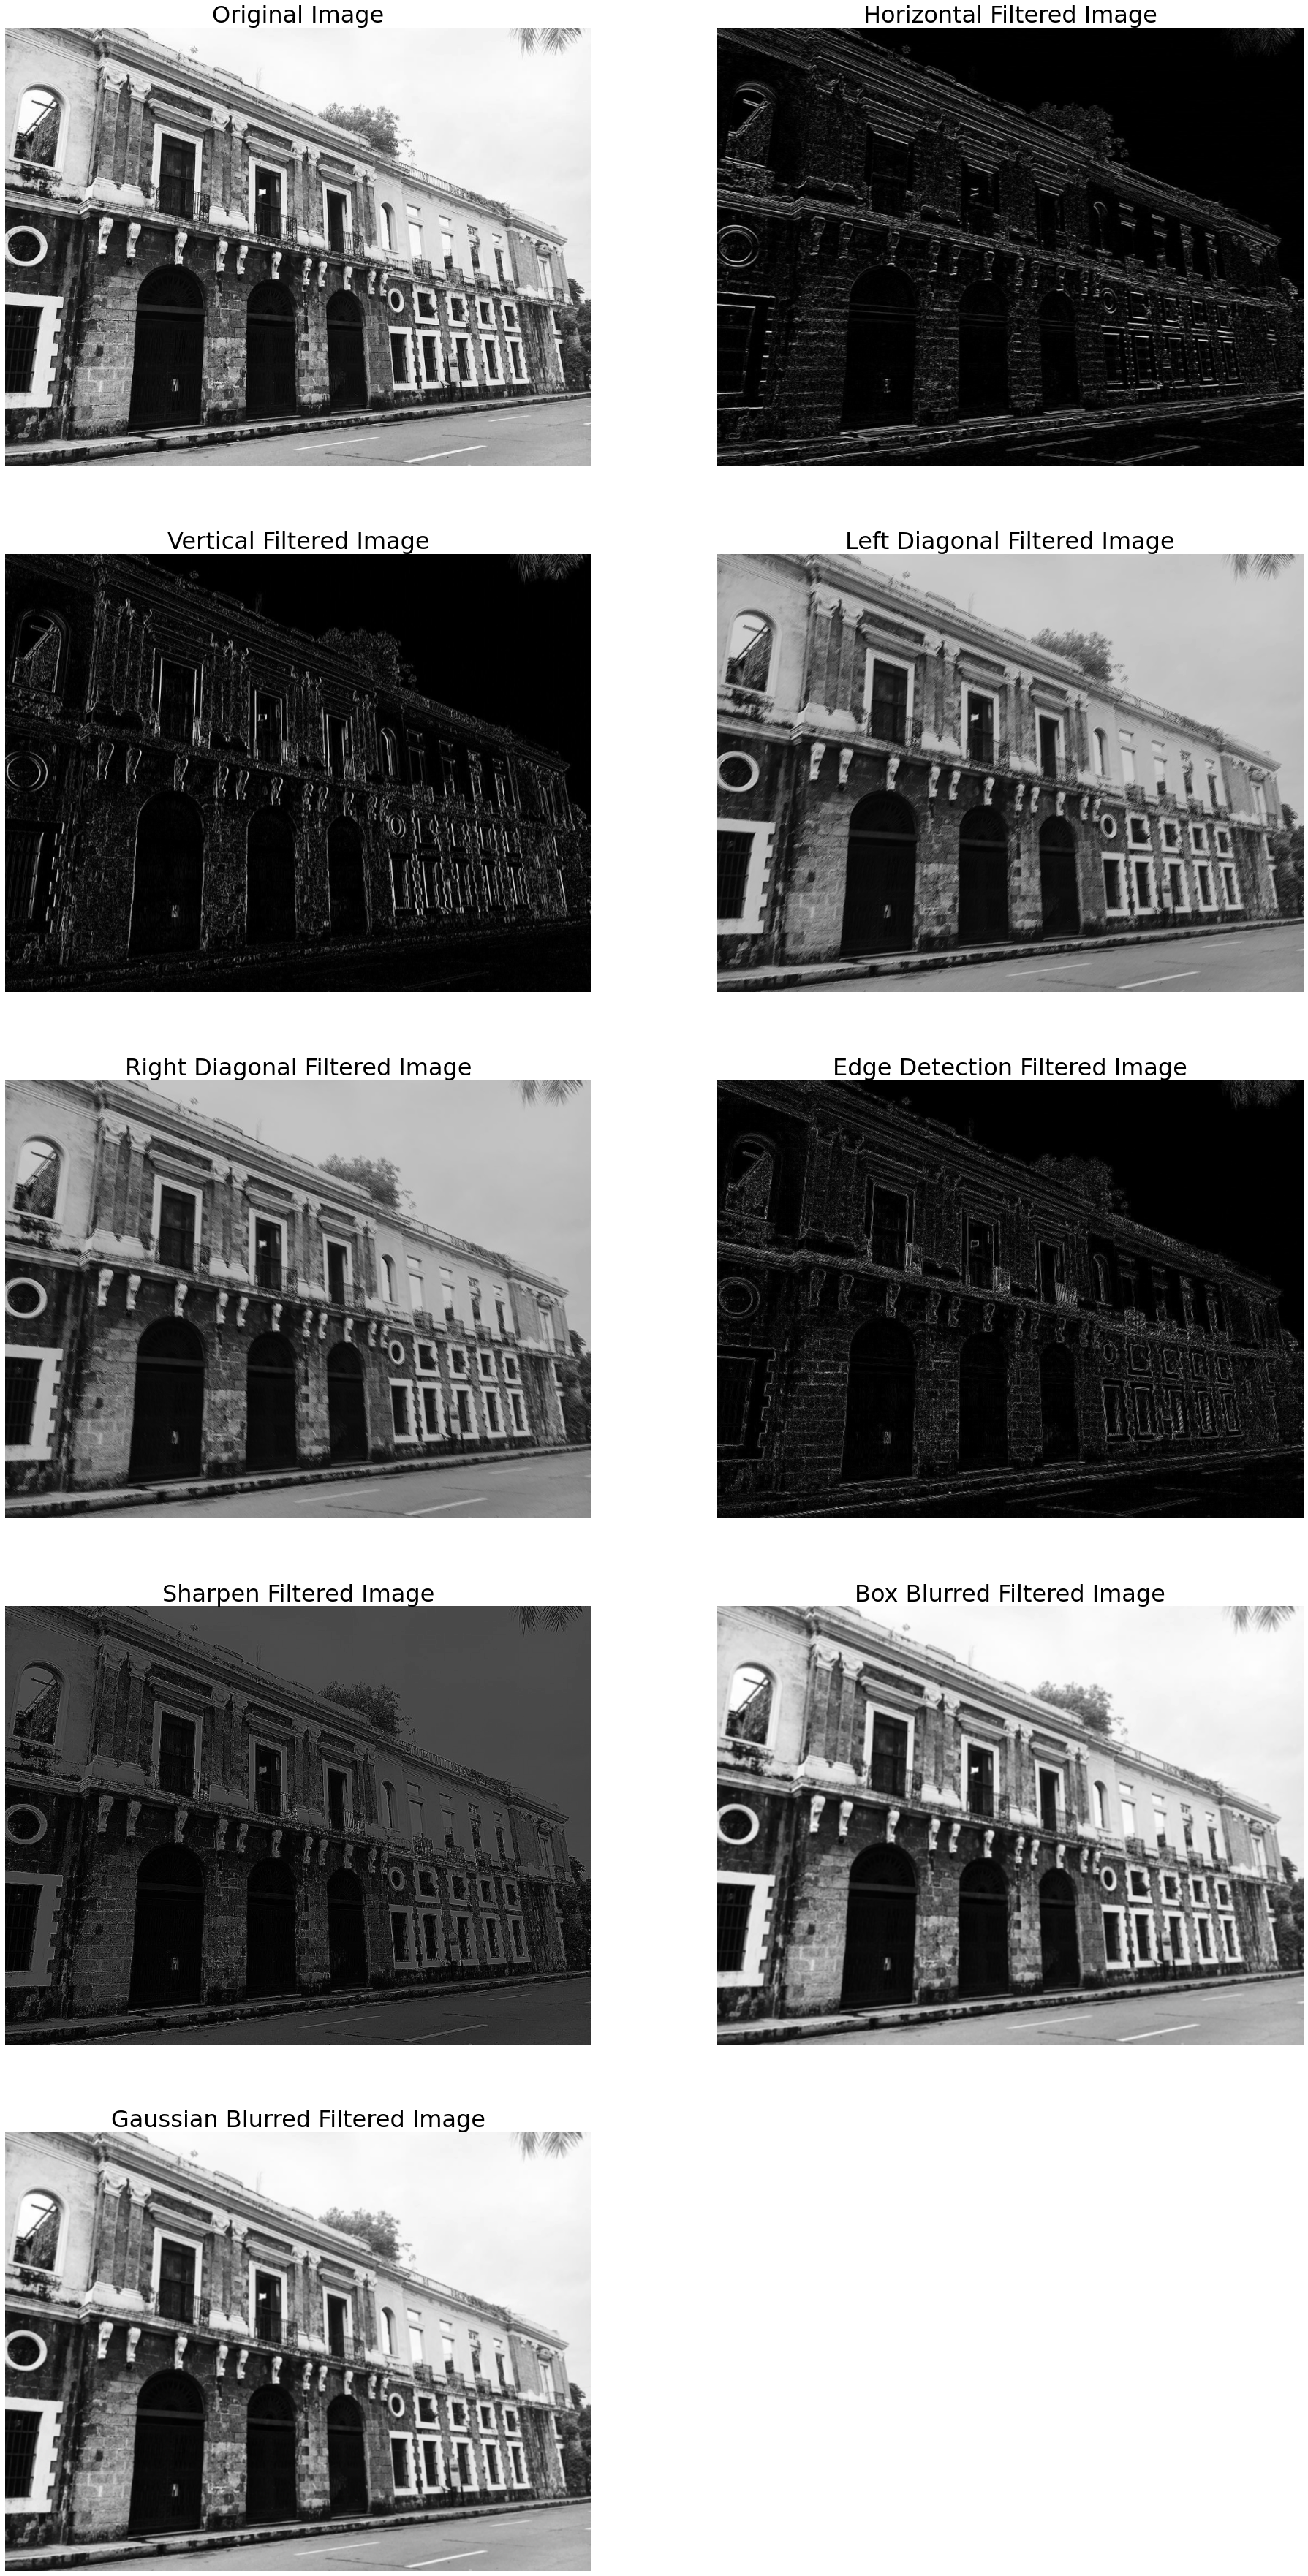

In [4]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
from skimage.io import imread, imshow

intra = imread('intramuros.PNG')
intra_bnw = rgb2gray(intra[:, :, :3])
conv_Horizontal = convolve2d(intra_bnw, kernel1, 'valid')
conv_Vertical = convolve2d(intra_bnw, kernel2, 'valid')
conv_Left_Diagonal = convolve2d(intra_bnw, kernel3, 'valid')
conv_Right_Diagonal = convolve2d(intra_bnw, kernel4, 'valid')
conv_Edge_Detection = convolve2d(intra_bnw, kernel5, 'valid')
conv_Sharpen = convolve2d(intra_bnw, kernel6, 'valid')
conv_Box_Blur = convolve2d(intra_bnw, kernel7, 'valid')
conv_Gaussian_Blur = convolve2d(intra_bnw, kernel8, 'valid')

fig, ax = plt.subplots(5, 2, figsize=(32,64))
ax[0,0].imshow(intra_bnw, cmap='gray')
ax[0,0].axis('off')
ax[0,0].set_title('Original Image', fontsize=32)
ax[0,1].imshow(abs(conv_Horizontal), cmap='gray')
ax[0,1].axis('off')
ax[0,1].set_title('Horizontal Filtered Image', fontsize=32)
ax[1,0].imshow(abs(conv_Vertical), cmap='gray')
ax[1,0].axis('off')
ax[1,0].set_title('Vertical Filtered Image', fontsize=32)
ax[1,1].imshow(abs(conv_Left_Diagonal), cmap='gray')
ax[1,1].axis('off')
ax[1,1].set_title('Left Diagonal Filtered Image', fontsize=32)
ax[2,0].imshow(abs(conv_Right_Diagonal), cmap='gray')
ax[2,0].axis('off')
ax[2,0].set_title('Right Diagonal Filtered Image', fontsize=32)
ax[2,1].imshow(abs(conv_Edge_Detection), cmap='gray')
ax[2,1].axis('off')
ax[2,1].set_title('Edge Detection Filtered Image', fontsize=32)
ax[3,0].imshow(abs(conv_Sharpen), cmap='gray')
ax[3,0].axis('off')
ax[3,0].set_title('Sharpen Filtered Image', fontsize=32)
ax[3,1].imshow(abs(conv_Box_Blur), cmap='gray')
ax[3,1].axis('off')
ax[3,1].set_title('Box Blurred Filtered Image', fontsize=32)
ax[4,0].imshow(abs(conv_Gaussian_Blur), cmap='gray')
ax[4,0].axis('off')
ax[4,0].set_title('Gaussian Blurred Filtered Image', fontsize=32)
ax[4,1].set_visible(False);

Interesting how using different kernels can result  to different beautiful images. What are your observations? What are the different features that you can spot from the images?

### Morphological Operations

Morphological operations are another type of image processing technique that are used to manipulate the shape and structure of objects in an image. These operations are based on mathematical morphology, which is a branch of mathematics that studies the shape and structure of objects. Morphological operations are performed using a structuring element, which is a small binary image that is used to probe the input image. The two most common morphological operations are erosion and dilation. Erosion is used to shrink or remove the boundaries of an object in an image, while dilation is used to expand or grow the boundaries of an object in an image. Other morphological operations include opening, which is a combination of erosion followed by dilation, and closing, which is a combination of dilation followed by erosion. These operations are useful for tasks such as noise removal, edge detection, and object recognition.

Let's start with a basic example using a solid circle and a a cross structural element. To better familiarize with the different draw functions from skimage, read here: https://scikit-image.org/docs/stable/api/skimage.draw.html

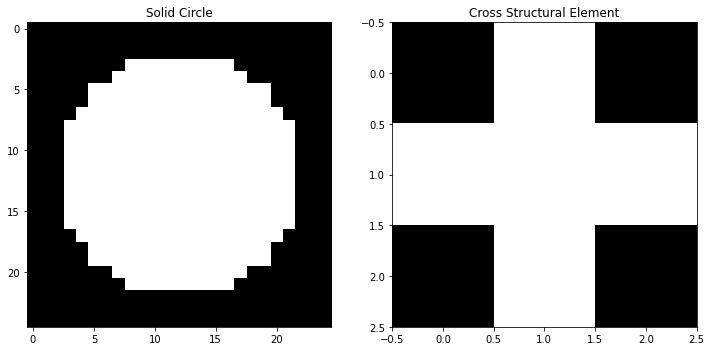

In [109]:
from skimage.draw import disk

shape = (25,25)
circ_img = np.zeros(shape, dtype=np.uint8)
rr, cc = disk((12,12),10, shape=shape)
circ_img[rr, cc] = 1

selem_circ = np.array([[0,1,0],
                     [1,1,1],
                     [0,1,0]])

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].imshow(circ_img, cmap='gray')
ax[0].set_title('Solid Circle')
ax[1].imshow(abs(selem_circ), cmap='gray')
ax[1].set_title('Cross Structural Element');

We are going to perform erosion on the circle and see how the structural element will affect the image. If you want to read more about erosion and dilation, visit this: https://scikit-image.org/docs/stable/api/skimage.morphology.html

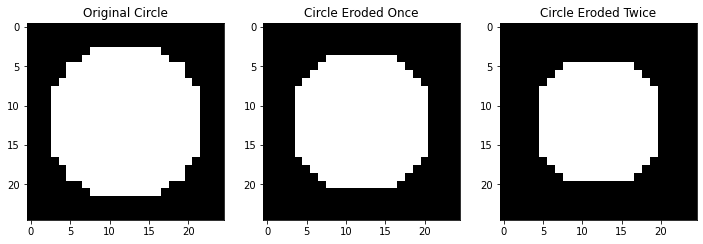

In [119]:
from skimage.morphology import erosion

erode_once = erosion(circ_img, selem_circ)
erode_twice = erosion(erosion(circ_img, selem_circ), selem_circ)

fig, ax = plt.subplots(1, 3, figsize=(12,6))
ax[0].imshow(circ_img, cmap='gray')
ax[0].set_title('Original Circle')
ax[1].imshow(abs(erode_once), cmap='gray')
ax[1].set_title('Circle Eroded Once')
ax[2].imshow(abs(erode_twice), cmap='gray')
ax[2].set_title('Circle Eroded Twice');

Erosion is a basic operation that removes the outermost layer of pixels from a binary image or a grayscale image. The operation involves scanning through the image with a small, predefined structure element (or kernel), comparing each pixel in the image with the corresponding pixel in the kernel. If all the pixels in the kernel match the corresponding pixels in the image, the center pixel of the kernel is preserved. Otherwise, it is removed. Technically, the operation being performed is "AND".

We are going to perform dilation on the circle as well and see how the structural element will affect the image.

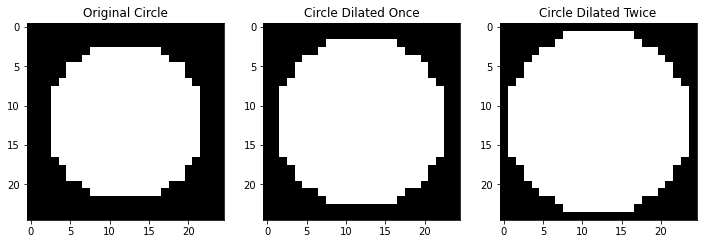

In [120]:
from skimage.morphology import dilation

dilalted_once = dilation(circ_img, selem_circ)
dilated_twice = dilation(dilation(circ_img, selem_circ), selem_circ)

fig, ax = plt.subplots(1, 3, figsize=(12,6))
ax[0].imshow(circ_img, cmap='gray')
ax[0].set_title('Original Circle')
ax[1].imshow(abs(dilalted_once), cmap='gray')
ax[1].set_title('Circle Dilated Once')
ax[2].imshow(abs(dilated_twice), cmap='gray')
ax[2].set_title('Circle Dilated Twice');

Dilation is an operation that is used to expand the boundaries of objects in a binary image or a grayscale image. In binary images, dilation works by replacing each pixel in the image with the maximum pixel value in its neighborhood. As with erosion, the neighborhood of a pixel is defined by a structuring element. If any pixel in the neighborhood is 1, then the pixel being processed is set to 1. This process results in the expansion of objects in the image, as the boundary pixels are progressively added. Technically, the operation being performed is "OR".

We can also use different structural elements like vertical and horizontal structural elements. Let's find out how these can affect the circle.

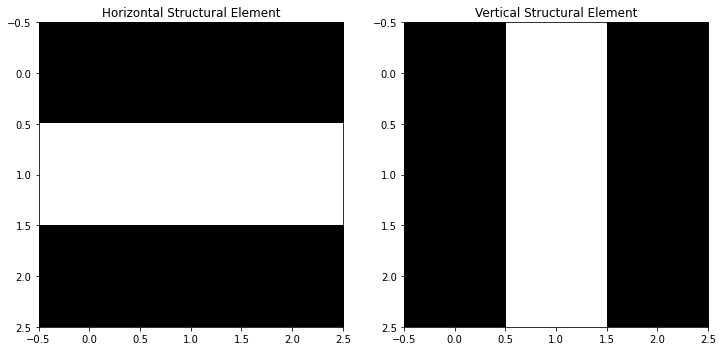

In [123]:
selem_hor = np.array([[0,0,0],
                     [1,1,1],
                     [0,0,0]])

selem_ver = np.array([[0,1,0],
                     [0,1,0],
                     [0,1,0]])

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].imshow(selem_hor, cmap='gray')
ax[0].set_title('Horizontal Structural Element')
ax[1].imshow(abs(selem_ver), cmap='gray')
ax[1].set_title('Vertical Structural Element');

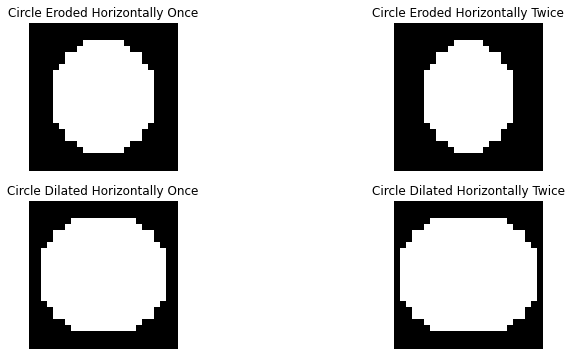

In [145]:
erode_once_hor = erosion(circ_img, selem_hor)
erode_twice_hor = erosion(erosion(circ_img, selem_hor), selem_hor)
dilalted_once_hor = dilation(circ_img, selem_hor)
dilated_twice_hor = dilation(dilation(circ_img, selem_hor), selem_hor)

fig, ax = plt.subplots(2, 2, figsize=(12,6))
ax[0, 0].imshow(erode_once_hor, cmap='gray')
ax[0, 0].set_title('Circle Eroded Horizontally Once')
ax[0, 0].axis('off')
ax[0, 1].imshow(abs(erode_twice_hor), cmap='gray')
ax[0, 1].set_title('Circle Eroded Horizontally Twice')
ax[0, 1].axis('off')
ax[1, 0].imshow(abs(dilalted_once_hor), cmap='gray')
ax[1, 0].set_title('Circle Dilated Horizontally Once')
ax[1, 0].axis('off')
ax[1, 1].imshow(abs(dilated_twice_hor), cmap='gray')
ax[1, 1].set_title('Circle Dilated Horizontally Twice')
ax[1, 1].axis('off');

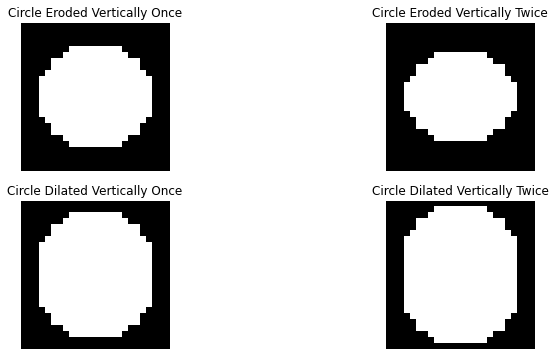

In [146]:
erode_once_ver = erosion(circ_img, selem_ver)
erode_twice_ver = erosion(erosion(circ_img, selem_ver), selem_ver)
dilalted_once_ver = dilation(circ_img, selem_ver)
dilated_twice_ver = dilation(dilation(circ_img, selem_ver), selem_ver)

fig, ax = plt.subplots(2, 2, figsize=(12,6))
ax[0, 0].imshow(erode_once_ver, cmap='gray')
ax[0, 0].set_title('Circle Eroded Vertically Once')
ax[0, 0].axis('off')
ax[0, 1].imshow(abs(erode_twice_ver), cmap='gray')
ax[0, 1].set_title('Circle Eroded Vertically Twice')
ax[0, 1].axis('off')
ax[1, 0].imshow(abs(dilalted_once_ver), cmap='gray')
ax[1, 0].set_title('Circle Dilated Vertically Once')
ax[1, 0].axis('off')
ax[1, 1].imshow(abs(dilated_twice_ver), cmap='gray')
ax[1, 1].set_title('Circle Dilated Vertically Twice')
ax[1, 1].axis('off');

Now using the horizontal and vertical structural elements, what can you observe? How different are the effects of using a specific structural element?

Let's combine these and create an opening and closing functions that may come in handy! Opening and closing are two morphological operations that are used to remove or fill small objects, smooth boundaries, and enhance features in binary or grayscale images.

Opening is a two-step process that involves erosion followed by dilation. It works by removing small objects and thin structures while preserving larger structures. In the first step, erosion is applied to the image, which removes the pixels that are not surrounded by a structuring element. In the second step, dilation is applied to the eroded image, which restores the size of the remaining objects but smooths their boundaries.

Closing is the opposite of opening, and it is also a two-step process that involves dilation followed by erosion. Closing works by filling in small holes and gaps while preserving the overall shape of the objects in the image. In the first step, dilation is applied to the image, which fills in the gaps and holes that are smaller than the structuring element. In the second step, erosion is applied to the dilated image, which restores the size of the objects while smoothing their boundaries.

In [147]:
def open_image(image, struc):
    """
    Perform opening operation on the input image
    using the provided structuring element.

    Returns
    -------
    numpy.ndarray
        The processed image after performing erosion followed by dilation.
    """
    op = dilation(erosion(erosion(image, struc),struc), struc)
    return op
    
def close_image(image, struc):
    """
    Perform closing operation on the input image
    using the provided structuring element.

    Returns
    -------
    numpy.ndarray
        The processed image after performing dilation followed by erosion.
    """
    cl = erosion(dilation(dilation(image, struc), struc), struc)
    return cl

Let's apply opening and closing morphological operations to perform these tasks on our sample images.

Task 1: Transform Art 1 to an image where only the circles are left.
<br>Task 2: Transform Art 2 to an image where only their horizontal or vertical lines are visible.
<br>Task 3: Transform Art 3 to an image where the gaps are fully connected.

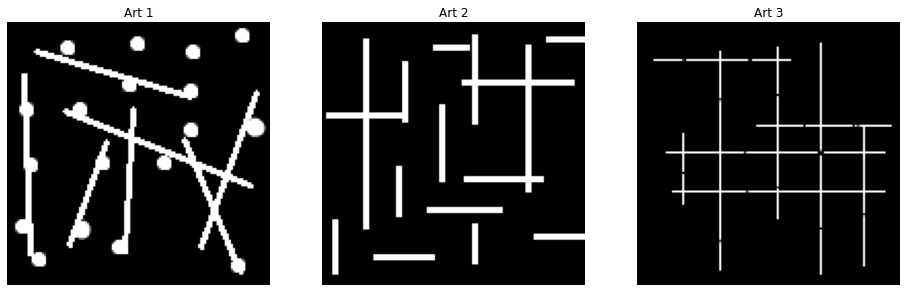

In [148]:
art1 = rgb2gray(imread('art1.PNG'))
art2 = rgb2gray(imread('art2.PNG'))
art3 = rgb2gray(imread('art3.PNG'))

fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].imshow(art1, cmap='gray')
ax[0].set_title('Art 1')
ax[0].axis('off')
ax[1].imshow(abs(art2), cmap='gray')
ax[1].set_title('Art 2')
ax[1].axis('off')
ax[2].imshow(abs(art3), cmap='gray')
ax[2].set_title('Art 3')
ax[2].axis('off');

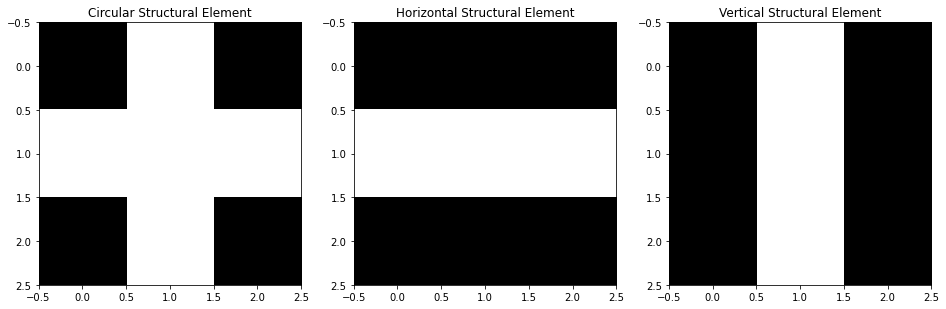

In [149]:
fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].imshow(selem_circ, cmap='gray')
ax[0].set_title('Circular Structural Element')
ax[1].imshow(abs(selem_hor), cmap='gray')
ax[1].set_title('Horizontal Structural Element')
ax[2].imshow(abs(selem_ver), cmap='gray')
ax[2].set_title('Vertical Structural Element');

For the first Art, we are going to open the image twice to using the vertical structural element and then the circular structural element respectively. The goal is to remove the lines but keep the circular structures of our image intact.

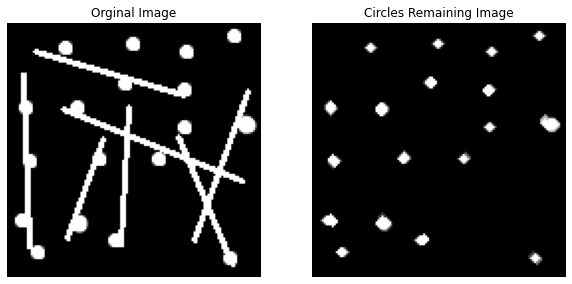

In [162]:
opart1 = open_image(art1, selem_ver)
opart1_dilated = close_image(open_image(opart1, selem_circ), selem_circ)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(art1, cmap='gray')
ax[0].set_title('Orginal Image')
ax[0].axis('off')
ax[1].imshow(abs(opart1_dilated), cmap='gray')
ax[1].set_title('Circles Remaining Image')
ax[1].axis('off');

For the second Art, we opened the image separately using the vertical and horizontal structural elements to keep the lines accordingly.

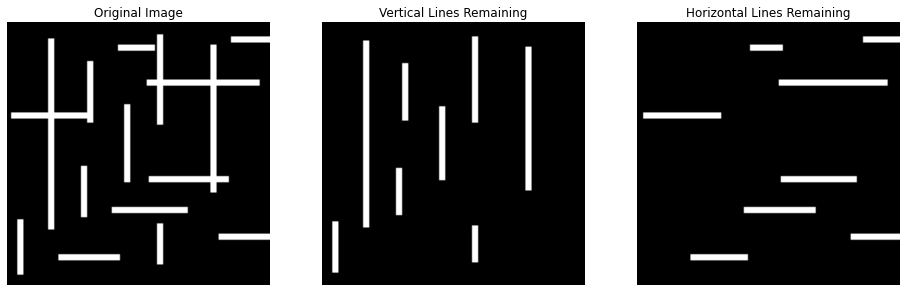

In [164]:
opart2_ver = open_image(art2, selem_ver)

opart2_hor = open_image(art2, selem_hor)

fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].imshow(art2, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(abs(opart2_ver), cmap='gray')
ax[1].set_title('Vertical Lines Remaining')
ax[1].axis('off')
ax[2].imshow(abs(opart2_hor), cmap='gray')
ax[2].set_title('Horizontal Lines Remaining')
ax[2].axis('off');

For the third Art, we use closing to remove the gaps from the image using the horizontal structural element and vertical element for one step each. Since the resulting image is expanded, we will be eroding the image twice with the goal of correcting for the adjustments performed to the image.

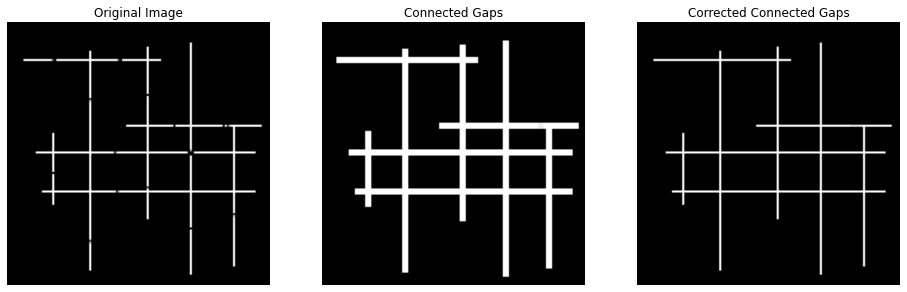

In [165]:
opart3 = close_image(close_image(art3, selem_hor), selem_ver)
thin_art = erosion(erosion(opart3, selem_ver), selem_hor)

fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].imshow(art3, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(abs(opart3), cmap='gray')
ax[1].set_title('Connected Gaps')
ax[1].axis('off')
ax[2].imshow(abs(thin_art), cmap='gray')
ax[2].set_title('Corrected Connected Gaps')
ax[2].axis('off');

In conclusion, we have discussed two important techniques in digital image processing, namely spatial filtering and morphological operations. These techniques are widely used in various applications such as image enhancement, feature extraction, and object recognition. By using spatial filters, we can manipulate the appearance of an image by applying different types of filters such as low-pass, high-pass, or median filters. Meanwhile, morphological operations allow us to manipulate the shape and structure of objects in an image by performing operations such as erosion, dilation, opening, and closing. It is important to note that these techniques are just a few examples of the many image processing techniques available, and the choice of technique will depend on the specific problem and the desired outcome. With this in mind, we hope that this post has provided you with a better understanding of spatial filtering and morphological operations, and how they can be applied in real-world scenarios.